In [139]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 8.18 List all samples of size *n* = 2 that are possible (with replacement) from the population in Problem 8.17.

$X = 9, 12, 15 $ \
$p(X) = 1/3$

In [141]:
import random
x = [9,12,15]

# credit_samples =  np.random.choice(x, size=(9, 2), replace=True)
credit_samples =[]
for i in x:
    for j in x:
        credit_samples.append((i,j))

credit_samples_df = pd.DataFrame({'Samples': credit_samples})
credit_samples_df.index = range(1, len(credit_samples_df) + 1)
credit_samples_df.transpose()


,1,2,3,4,5,6,7,8,9
Samples,"(9, 9)","(9, 12)","(9, 15)","(12, 9)","(12, 12)","(12, 15)","(15, 9)","(15, 12)","(15, 15)"


Show that $\mu_{\bar(x)} =\mu$ and $\sigma_{\bar(x)}^2 = \sigma^2 /2$

In [142]:
credit_sample_means = []
for i in range(len(credit_samples)):
    sample_mean = np.mean(credit_samples[i])
    credit_sample_means.append(sample_mean)

mean_credit_sample_means = np.mean(credit_sample_means)

var_credit_sample_means = np.var(credit_sample_means)

x_var = np.var(x)/2

print(f"\nMean of sample means: {mean_credit_sample_means} \nMean: {np.mean(x)}")
print(f"\nVariance of sample means: {var_credit_sample_means} \nVariance/N: {x_var}")


Mean of sample means: 12.0 
Mean: 12.0

Variance of sample means: 3.0 
Variance/N: 3.0


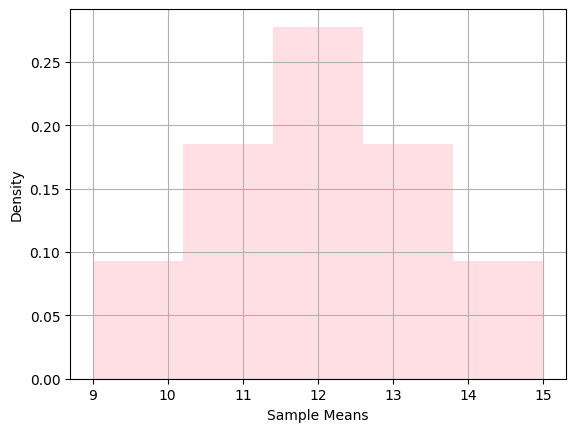

In [145]:

plt.hist(credit_sample_means, bins=5, density=True, alpha=0.5, color='pink')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.grid()
plt.show()

#### 8.21 A population consists of four numbers 3, 7, 11, and 15. Consider all possible samples of size 2 that can be drawn with replacement from this population. Find (a) the population mean, (b) the population standard deviation, (c) the mean of the sampling distribution of means, and (d) the standard deviation of the sampling distribution of means

In [10]:
population = [3,7,11,15]
pop_samples = []
for x in population:
    for y in population:
        pop_samples.append((x,y))

pop_samples_df = pd.DataFrame({'Samples': pop_samples})
pop_samples_df.index = range(1, len(pop_samples_df) + 1)
display(pop_samples_df.transpose())

pop_mean = np.mean(population)
pop_stdev = np.std(population)

sample_means = []
for i in range(len(pop_samples)):
    sample_mean = np.mean(pop_samples[i])
    sample_means.append(sample_mean)
    
mean_sample_means = np.mean(sample_means)
stdev_sample_means = pop_stdev/np.sqrt(2)


print(f"Population Mean : {pop_mean} \nPopulation Std. Dev.: {round(pop_stdev,4)} \n\nMean of Sample Means: {mean_sample_means} \nStd. Dev. of Sample means: {round(stdev_sample_means,4)}")


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Samples,"(3, 3)","(3, 7)","(3, 11)","(3, 15)","(7, 3)","(7, 7)","(7, 11)","(7, 15)","(11, 3)","(11, 7)","(11, 11)","(11, 15)","(15, 3)","(15, 7)","(15, 11)","(15, 15)"


Population Mean : 9.0 
Population Std. Dev.: 4.4721 

Mean of Sample Means: 9.0 
Std. Dev. of Sample means: 3.1623


#### 8.34 Find the probability that of the next 200 children born, (a) less than 40% will be boys, (b) between 43% and 57% will be girls, and (c) more than 54% will be boys. Assume equal probabilities for the births of boys and girls.



In [20]:
p = 0.5
q = 1-p
n = 200

sample_mean = p*n
sample_stdev = np.sqrt(n*p*q)

def zscore(x,m,s):
    return (x-m)/s

# P(X<80)
prob_a = stats.norm.cdf(80+0.5, sample_mean,sample_stdev)

# P(86<X<114)
prob_b = stats.norm.cdf(114+0.5,sample_mean,sample_stdev) - stats.norm.cdf(86-0.5,sample_mean,sample_stdev)

# P(X>108)
prob_c = 1- stats.norm.cdf(108+0.5,sample_mean,sample_stdev)

print(f"a) P(X<80) = {round(prob_a,4)} \nb) P(86<X<114) = {round(prob_b,4)} \nc) P(X>108) = {round(prob_c,4)}")

a) P(X<80) = 0.0029 
b) P(86<X<114) = 0.9597 
c) P(X>108) = 0.1147


#### 8.49 Find $\mu$ and $\sigma^2$ 2. Give the 25 (with replacement) possible samples of size 2, their means, and their probabilities.

In [51]:
x = [6,9,12,15,18]
px = [0.1,0.2,0.4,0.2,0.1]

def square(list):
    return [i ** 2 for i in list]
x2 = square(x)
mean = 0
n=0

# mean
for i in x:
    mean += x[n]*px[n]
    n+=1
# variance
x2_sum = 0
n = 0
for i in x2:
    x2_sum += x2[n]*px[n]
    n+=1
var = x2_sum - (mean**2)

print(f"Mean: {round(mean,4)}\nVariance: {round(var,4)}")

Mean: 12.0
Variance: 10.8


In [52]:
samples =[]

for i in x:
    for j in x:
        samples.append((i,j))

sample_means=[]
for sample in samples:
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

samples_prob = []

for sample in samples:
    prob = px[x.index(sample[0])] * px[x.index(sample[1])]
    samples_prob.append(prob)

samples_df = pd.DataFrame({'Samples':samples}).transpose()
samples_means_df = pd.DataFrame({'Mean': sample_means}).transpose()
samples_prob_df = pd.DataFrame({'Probability': samples_prob}).transpose()

table_df = pd.concat([samples_df,samples_means_df, samples_prob_df]).transpose()
table_df.index = range(1, len(table_df) + 1)
table_df

,Samples,Mean,Probability
1,"(6, 6)",6.0,0.01
2,"(6, 9)",7.5,0.02
3,"(6, 12)",9.0,0.04
4,"(6, 15)",10.5,0.02
5,"(6, 18)",12.0,0.01
6,"(9, 6)",7.5,0.02
7,"(9, 9)",9.0,0.04
8,"(9, 12)",10.5,0.08
9,"(9, 15)",12.0,0.04
10,"(9, 18)",13.5,0.02
